# 🎓 Proyecto: Estadística para Data Science - Víctor Horcas Puertas

¡Bienvenido al reto final!

Este proyecto tiene como objetivo integrar y aplicar todas las habilidades estadísticas adquiridas durante el curso. El trabajo se divide en 4 partes:

1.  **Análisis Descriptivo (Dataset Libre):** Exploración profunda de un dataset de tu elección.
2.  **Inferencia y Modelado (Dataset Libre):** Análisis de relaciones y predicción sobre tus datos.
3.  **Regresión Lineal "From Scratch" (NumPy):** Implementación técnica de una regresión lineal simple usando solo matemáticas y NumPy.
4.  **Series Temporales:** Análisis de tendencia y estacionalidad en datos simulados.

---

###  Instrucciones Previas
Antes de comenzar, busca un dataset en [Kaggle](https://www.kaggle.com/) o una fuente confiable. Idealmente, debe tener:
*   Al menos 5 variables (numéricas y categóricas).
*   Un número razonable de filas (+1000).
*   Una variable numérica clara que te gustaría predecir (Target/Y).

**Justificación de decisiones**
* Cada elección relevante (dataset, variables, métricas, supuestos estadísticos, etc.) debe estar brevemente justificada desde un punto de vista estadístico.

**Validación de supuestos**
* Siempre que se aplique un modelo o técnica estadística, se deberán comprobar explícitamente sus supuestos (normalidad, independencia, homocedasticidad, linealidad, estacionariedad, etc., según corresponda).

**Interpretación de resultados**
* No basta con calcular estadísticas o ajustar modelos: los resultados deben ser interpretados en lenguaje claro, conectándolos con el contexto de los datos.

**Reproducibilidad**
* El trabajo debe ser completamente reproducible: cualquier persona debería poder ejecutar el código y obtener los mismos resultados sin modificaciones manuales.


**Antes de comenzar voy a cargar todas las librerías que voy a usar para este proyecto en esta primera celda**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## PARTE 1: Análisis Descriptivo (Dataset Propio)

**Objetivo:** Comprender la naturaleza de tus datos antes de modelar.

**Requisitos:**
1.  **Carga y Vista General:** Importa pandas, carga tu CSV y muestra las primeras filas, info y tipos de datos.
2.  **Clasificación de Variables:** Identifica explícitamente cuáles son Nominales, Ordinales, Discretas y Continuas.
3.  **Estadísticos Descriptivos:** Usa `.describe()` e interpreta la media vs mediana (¿Hay sesgo?).
4.  **Detección de Outliers:** Identifica valores atípicos en tus variables numéricas usando Boxplots y el criterio del Rango Intercuartílico (IQR).
5.  **Visualización de Distribuciones:** Plotea histogramas para tus variables principales.

**Conclusión:** Escribe un breve párrafo resumiendo la calidad de tus datos (¿Hay nulos? ¿Outliers? ¿Sesgo?).

-------

**Amplia el analisis:**

- **Análisis de valores nulos**  
  Identifica la cantidad y el porcentaje de valores nulos por variable. Reflexiona brevemente sobre si su presencia parece aleatoria o estructural.

- **Comparación entre variables numéricas**  
  Selecciona al menos dos variables numéricas y analiza si presentan escalas o rangos muy distintos, comentando posibles implicaciones para futuros modelos.

  También se debe valorar como son los valores de las diferentes metricas para diferentes categorías dentro de tu data set. ej Diferencias por genero, edad, zona geográfica ...

- **Asimetría y curtosis**  
  Calcula la asimetría (skewness) de al menos una variable numérica e interpreta su relación con la forma observada en el histograma.

- **Outliers: impacto potencial**  
  Para una variable con outliers detectados, discute brevemente cómo podrían afectar al análisis inferencial o a un modelo predictivo posterior.

- **Calidad global del dataset**  
  Amplía la conclusión final incorporando una valoración general de si el dataset está “listo para modelar” o si requeriría una fase adicional de limpieza y transformación.

### Carga y vista general del dataset

In [5]:
df = pd.read_csv("D:/Data Science Projects/thirdprojectstatistics/Students Social Media Addiction.csv")

In [6]:
df.head(5)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


Hay que tener en cuenta que este dataset y las conclusiones que se extraigan de este, deben ser vistas desde un punto de vista subjetivo, ya que:

1. No contamos con datos suficientes como para hacer un buen estudio a nivel mundial de la adicción a las redes sociales en estudiantes (en este dataset se incluyen estudiantes a nivel global).

2. La mayoría de datos relevantes de este dataset están extraídos de encuestas realizadas a ellos mismos, es decir, no hay ningún punto objetivo de profesionales tales como, psicólogos, médicos... que puedan medir de una forma objetiva variables como la salud mental de estos estudiantes.

3. Estas encuestas han sido realizadas en un momento concreto del tiempo (Q1 - 2025).

### Clasificación de las variables

In [7]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    str    
 3   Academic_Level                705 non-null    str    
 4   Country                       705 non-null    str    
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    str    
 7   Affects_Academic_Performance  705 non-null    str    
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    str    
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: float64(2), i

In [8]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='str')

Academic_Level - High School / Undergraduate / Graduate

Avg_Daily_Usage_Hours - Promedio de horas por día en redes sociales

Affects_Academic_Performance - Impacto autoinformado en el ámbito académico

Sleep_Hours_Per_Night - Promedio de horas de sueño nocturno

Mental_Health_Score - Salud mental autoevaluada (1 = mala a 10 = excelente)

Relationship_Status - Single / In Relationship / Complicated

Conflicts_Over_Social_Media - Número de conflictos de pareja debido a las redes sociales

Addicted_Score - Puntuación de adicción a las redes sociales (1 = bajo a 10 = alto)

- Variables cualitativas nominales: Representan cualidades o etiquetas --> Gender, Country, Most_Used_Platform, Relationship_Status...

- Variables cualitativas ordinales: Tienen un orden o jerarquía como Academic_Level, en este caso.

- Variables cuantitativas discretas: Cantidades medibles numéricamente (enteras) --> Age, Mental_Health_Score, Addicted_Score, Conflicts_Over_Social_Media...

- Variables cuantitavias continuas: Toman cualquier valor dentro de un rango --> Avg_Daily_Usage_Hours y Sleep_Hours_Per_Night.



### Estadísticos descriptivos

In [9]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Durante este análisis la variable más relevante del proyecto será la variable **Addicted_Score**, ya que, mide el nivel de adicción a las redes sociales de las personas encuestadas.

Por ello va a ser la **variable objetivo** durante gran parte del análisis.

Comparando la media (6.45) con la mediana (7) para esta variable, podemos observar que la media tiene un valor algo menor.

Por ello podemos concluir que hay un pequeño sesgo negativo, lo cuál significa que la mayoría de estudiantes tienden a tener puntuaciones de adicción altas (la mitad de los estudiantes tienen un 7 o más de puntuación en cuanto a su adicción a las redes sociales).

Para el resto de variables podemos ver que en general este análisis cuenta con variables bastante bien balanceadas, ya que, no existen grandes diferencias entre la media y la mediana.

### Análisis de nulos

In [10]:
# 1. Conteo de valores nulos por columna
print(df.isnull().sum())

# 2. Verificacón de nulos en todo el DataFrame
print(df.isnull().any().any())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
False


Este dataset no cuenta con **valores nulos**.

### ASIMETRÍA Y CURTOSIS

Asimetría (Skewness): -0.2968
Curtosis (Kurtosis):  -0.8945


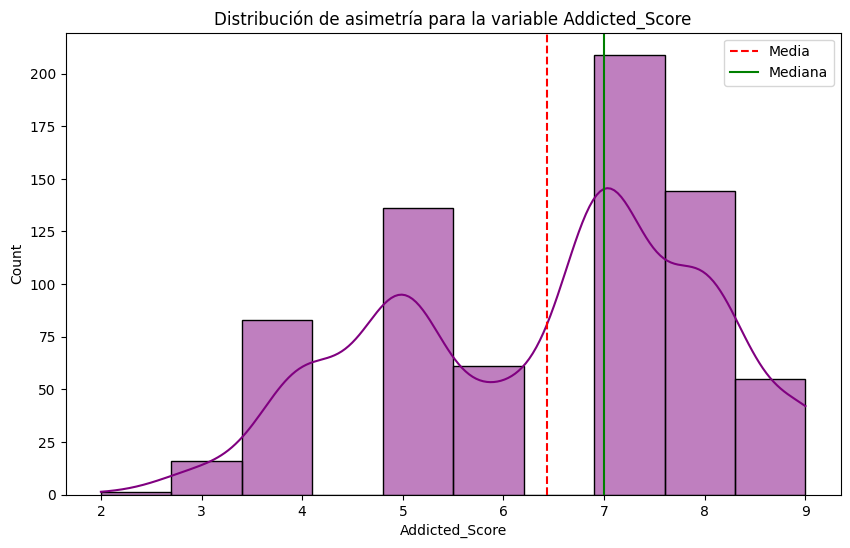

In [14]:
# 1. Valores numéricos
asimetria = df['Addicted_Score'].skew()
curtosis = df['Addicted_Score'].kurt()

print(f"Asimetría (Skewness): {asimetria:.4f}")
print(f"Curtosis (Kurtosis):  {curtosis:.4f}")

# 2. Genero el histograma con la curva de densidad
plt.figure(figsize=(10, 6))
sns.histplot(df['Addicted_Score'], kde=True, color='purple', bins=10)

# Añado líneas verticales para la Media y la Mediana, para facilitar la visualización de la asimetría
plt.axvline(df['Addicted_Score'].mean(), color='red', linestyle='--', label='Media')
plt.axvline(df['Addicted_Score'].median(), color='green', linestyle='-', label='Mediana')

plt.title('Distribución de asimetría para la variable Addicted_Score')
plt.legend()
plt.show()

Asimetría negativa, es decir, asimetría a la izquierda. Los datos de mi variable están concentrados especialmente en valores altos.

Valor de Curtosis negativo, campana más achatada con respecto a una distribución normal, es decir, los datos están mayormente dispersos y no hay un pico central claro.

### OUTLIERS

Haciendo uso del Rango intercuartílico (IQR), compruebo la existencia de outliers en mi variavle objetivo (Addicted_Score).

In [15]:
# 1. Calcular Q1 (percentil 25) y Q3 (percentil 75)
Q1 = df['Addicted_Score'].quantile(0.25)
Q3 = df['Addicted_Score'].quantile(0.75)

# 2. Calcular el Rango Intercuartílico (IQR)
IQR = Q3 - Q1

# 3. Definir los límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")

# 4. Filtrar y contar los outliers
outliers = df[(df['Addicted_Score'] < limite_inferior) | (df['Addicted_Score'] > limite_superior)]
print(f"Total de outliers detectados: {len(outliers)}")

Límite Inferior: 0.5
Límite Superior: 12.5
Total de outliers detectados: 0


Mi variable objetivo no presenta valores atípicos, realizo la representación en un **boxplot**.

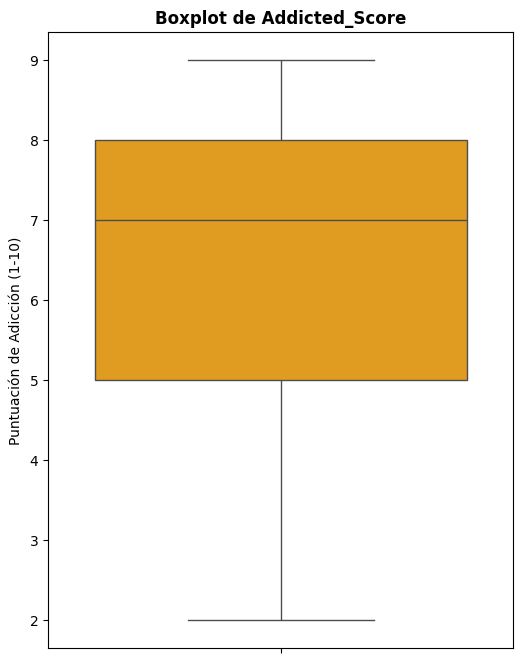

In [17]:
plt.figure(figsize=(6, 8))

# Boxplot con Seaborn
sns.boxplot(y=df['Addicted_Score'], color='orange')
plt.title('Boxplot de Addicted_Score', fontweight='bold')
plt.ylabel('Puntuación de Adicción (1-10)', fontsize=10)

plt.show()

A continuación establezco un bucle para ver si existen outliers para todas las variables numéricas de mi dataset.

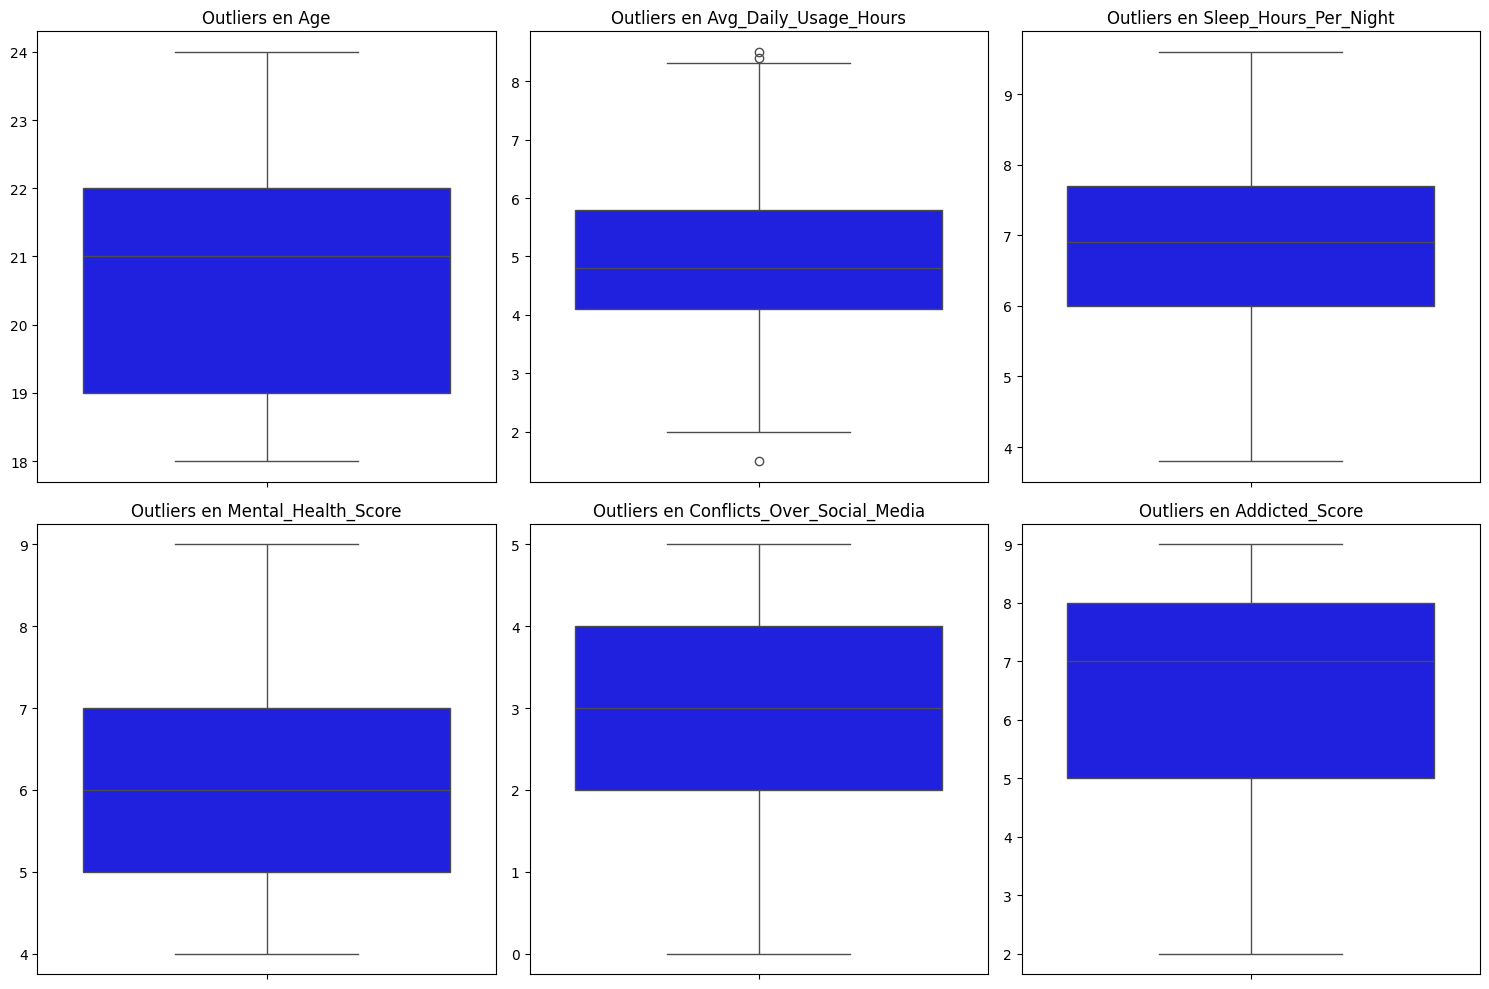

In [18]:
# Selecciono solo las columnas numéricas
numericas = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
             'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(15, 10))

for i, columna in enumerate(numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[columna], color='blue')
    plt.title(f'Outliers en {columna}')
    plt.ylabel('') 

plt.tight_layout()
plt.show()

Como podemos ver en la media de uso diario de las redes sociales sí que existen algunos valores atípicos.

### Visualización de distribuciones

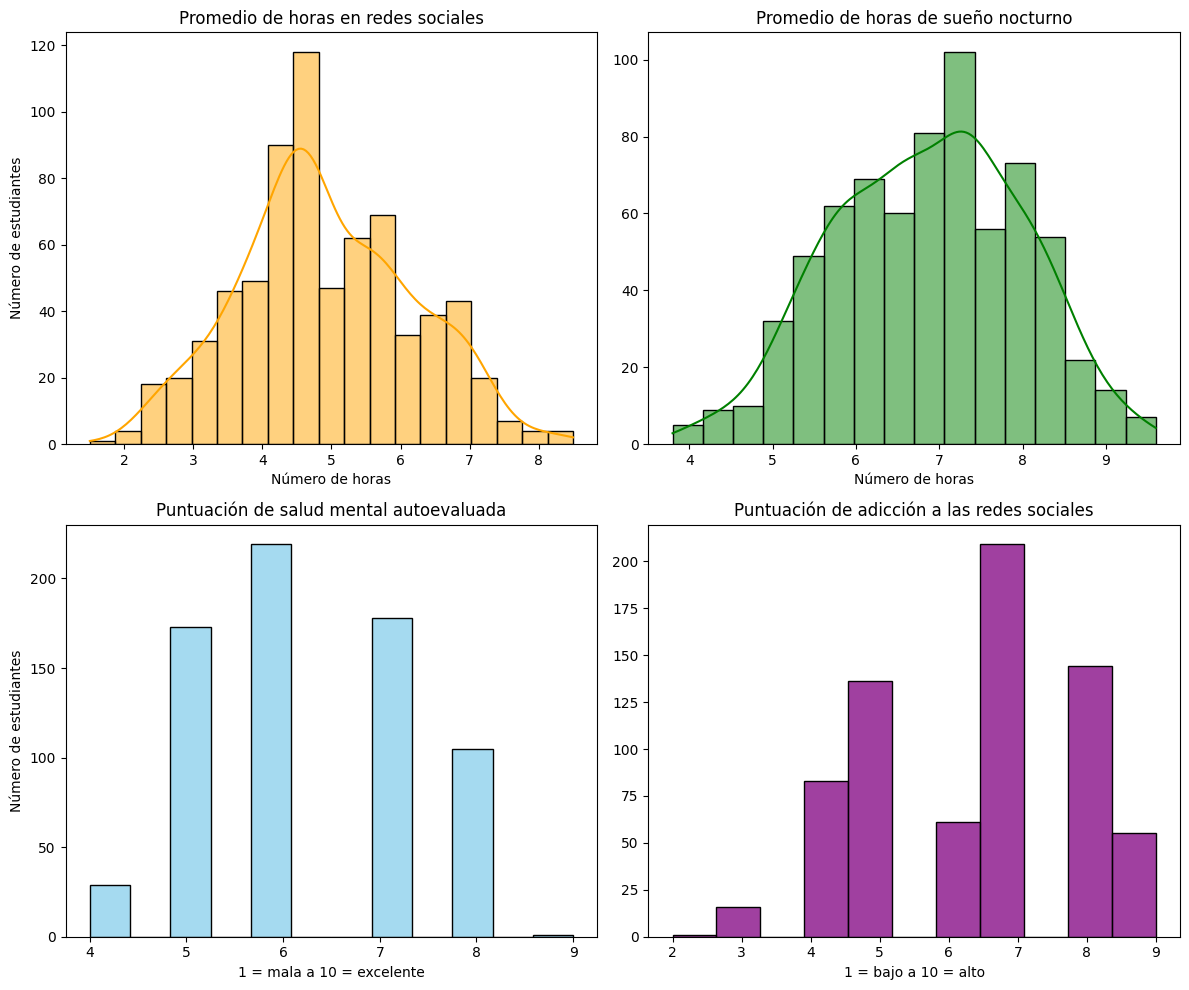

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Histograma 1
sns.histplot(data=df, x='Avg_Daily_Usage_Hours', ax=axs[0, 0], color='orange', kde=True)
axs[0, 0].set_title('Promedio de horas en redes sociales')
axs[0, 0].set_xlabel('Número de horas')
axs[0, 0].set_ylabel('Número de estudiantes')

# Histograma 2
sns.histplot(data=df, x='Sleep_Hours_Per_Night', ax=axs[0, 1], color='green', kde=True)
axs[0, 1].set_title('Promedio de horas de sueño nocturno')
axs[0, 1].set_xlabel('Número de horas')
axs[0, 1].set_ylabel(None)

# Histograma 3
sns.histplot(data=df, x='Mental_Health_Score', ax=axs[1, 0], color='skyblue')
axs[1, 0].set_title('Puntuación de salud mental autoevaluada')
axs[1, 0].set_xlabel('1 = mala a 10 = excelente')
axs[1, 0].set_ylabel('Número de estudiantes')

# Histograma 4
sns.histplot(data=df, x='Addicted_Score', ax=axs[1, 1], color='purple')
axs[1, 1].set_title('Puntuación de adicción a las redes sociales')
axs[1, 1].set_xlabel('1 = bajo a 10 = alto')
axs[1, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

- Los estudiantes consumen de media entre 4 y 5 horas al día las redes sociales, y preocupantemente, hay un grupo que está en torno a las 7 y 8 horas diarias de consumo.

- Parece ser que este uso de las redes sociales no afecta a sus horas de sueño, ya que, la gran mayoría se encuentra entre las 7 y 8 horas de sueño diarias y tampoco vemos valores muy bajos en cuanto a la salud mental, de hecho ningún estudiante califica su salud mental entre el 1 y el 3, la gran mayoría está entre el 6 y el 7.

- La mayoría de los estudiantes se perciben a si mismo como adictos a las redes sociales, siendo una puntuación de 7 la más alta para esta variable.

--------------------------------

Al no tener celdas vacías y no haber datos atípicos que distorsionen la realidad, considero que no es necesario realizar una limpieza de datos. Además, la información está bien balanceada, lo que va a facilitar el análisis del modelo.


--------------------------------

## PARTE 2: Inferencia y Modelado (Dataset Propio)

**Objetivo:** Descubrir relaciones entre variables y predecir resultados.

**Requisitos:**
1.  **Análisis de Correlación:** Genera una matriz de correlación y visualízala con un Heatmap. ¿Qué variables están más relacionadas con tu Target?
2.  **Relaciones Bivariantes:** Crea Scatter Plots para visualizar la relación entre las variables independientes más fuertes y tu variable objetivo.
3.  **Regresión Lineal (Scikit-Learn):**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

4. **Regresión logistica:**
    *   Selecciona tus variables predictoras ($X$) y tu objetivo ($y$).
    *   Realiza un Train/Test Split (80/20).
    *   Entrena un modelo de Regresión Lineal.
    *   Evalúa el modelo usando **R²** y **RMSE**.

**📝 Conclusión:** ¿Es tu modelo capaz de predecir con precisión? ¿Qué variables son las más influyentes?¿Qué tipo de regresión es la más apropiada?

---------
  Amplía el análisis incorporando los siguientes aspectos:

- **Diagnóstico del modelo de regresión lineal**
  Analiza los residuos del modelo entrenado:
  - Distribución de los residuos
  - Relación entre residuos y valores predichos  
  Comenta si se cumplen los supuestos básicos del modelo.

- **Regresión logística: adecuación del modelo**
  Justifica si la regresión logística es apropiada para tu variable objetivo y discute las diferencias conceptuales con la regresión lineal.

- **Comparación de modelos**
  Compara brevemente el rendimiento y la idoneidad de ambos enfoques (lineal vs. logístico) más allá de las métricas numéricas.

Durante este análisis la variable más relevante del proyecto será la variable **Addicted_Score**, ya que, mide el nivel de adicción a las redes sociales de las personas encuestadas.

Por ello va a ser la **variable objetivo** durante gran parte del análisis.

### Matriz de CORRELACIÓN

La matriz de correlación utiliza generalmente el Coeficiente de Pearson ($r$). 

Mide la fuerza y la dirección de una relación lineal entre dos variables continuas:

- 1 (Positiva perfecta): Si una variable sube, la otra también sube en la misma proporción.

- -1 (Negativa perfecta): Si una variable sube, la otra baja.

- 0 (Nula): No hay relación lineal entre las variables.

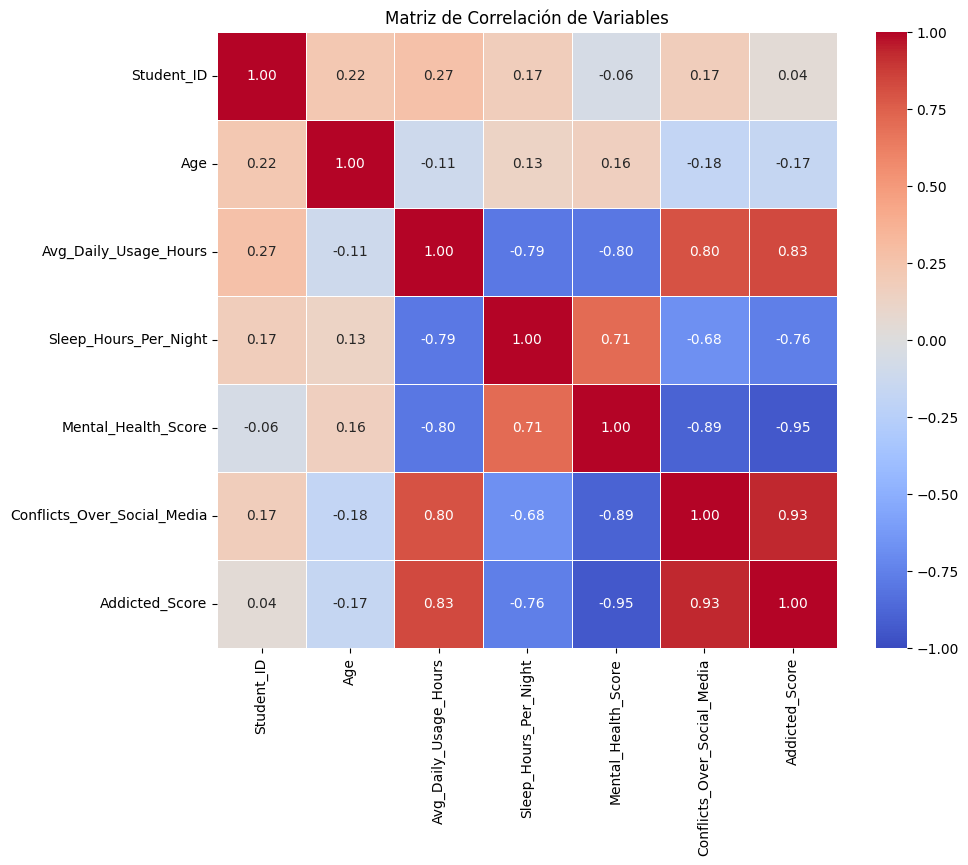

In [21]:
matriz_corr = df.corr(numeric_only=True)
# Visualización de la matriz en un heatmap
plt.figure(figsize=(10, 8)) 

sns.heatmap(matriz_corr, 
            annot=True,       
            fmt=".2f",        
            cmap='coolwarm',  
            linewidths=0.5,   
            vmin=-1, vmax=1)

plt.title("Matriz de Correlación de Variables")
plt.show()

- Podemos observar una correlación fuerte positivamente (valores más cercanos a 1) entre las variables: 
Promedio de horas por día en redes sociales y el número de conflictos de pareja debido a las redes sociales con la puntuación de adicción a las redes sociales.

- Podemos observar una correlación fuerte negativamente (valores más cercanos a -1) entre las variables: 
Número de conflictos de pareja debido a las redes sociales y la puntuación de adicción a las redes sociales con la valoración de salud mental.

- Podemos observar una correlación prácticamente nula (valores más cercanos a 0) entre las variables: 
Edad con número de horas dormidas cada noche.

Las variable Mental_Health_Score es la más relacionada con mi variable objetivo negativamente (-0.95) y la variable Conflicts_Over_Social_Media es la más relacionada positivamente (0.93).

**Relación entre las variables independientes y mi variable objetivo**


Para no realizar un análisis distorsionado, en esta parte de representación sobre cómo se relacionan las variables independientes con mi variable objetivo voy a eliminar la variable Mental_Health_Score, ya que, presenta una correlación muy fuerte con algunas de mis otras variables independientes.

In [22]:
df_clean = df.drop('Mental_Health_Score', axis=1)

Usaré **pairplot()** para ver mejor estas relaciones.
    Esta función crea una cuadrícula de ejes tal que:

    - La Diagonal Principal: Muestra la distribución de una sola variable. Se busca si las curvas tienen forma de campana (distribución normal) o si tienen dos picos (bimodal), lo que sugeriría que hay dos grupos distintos de datos mezclados.

    - El resto de celdas: Son diagramas de dispersión (scatter plots) que cruzan la variable de la fila con la de la columna. Si son nubes redondas (no hay correlación), si son líneas o formas alargadas (existe correlación lineal).

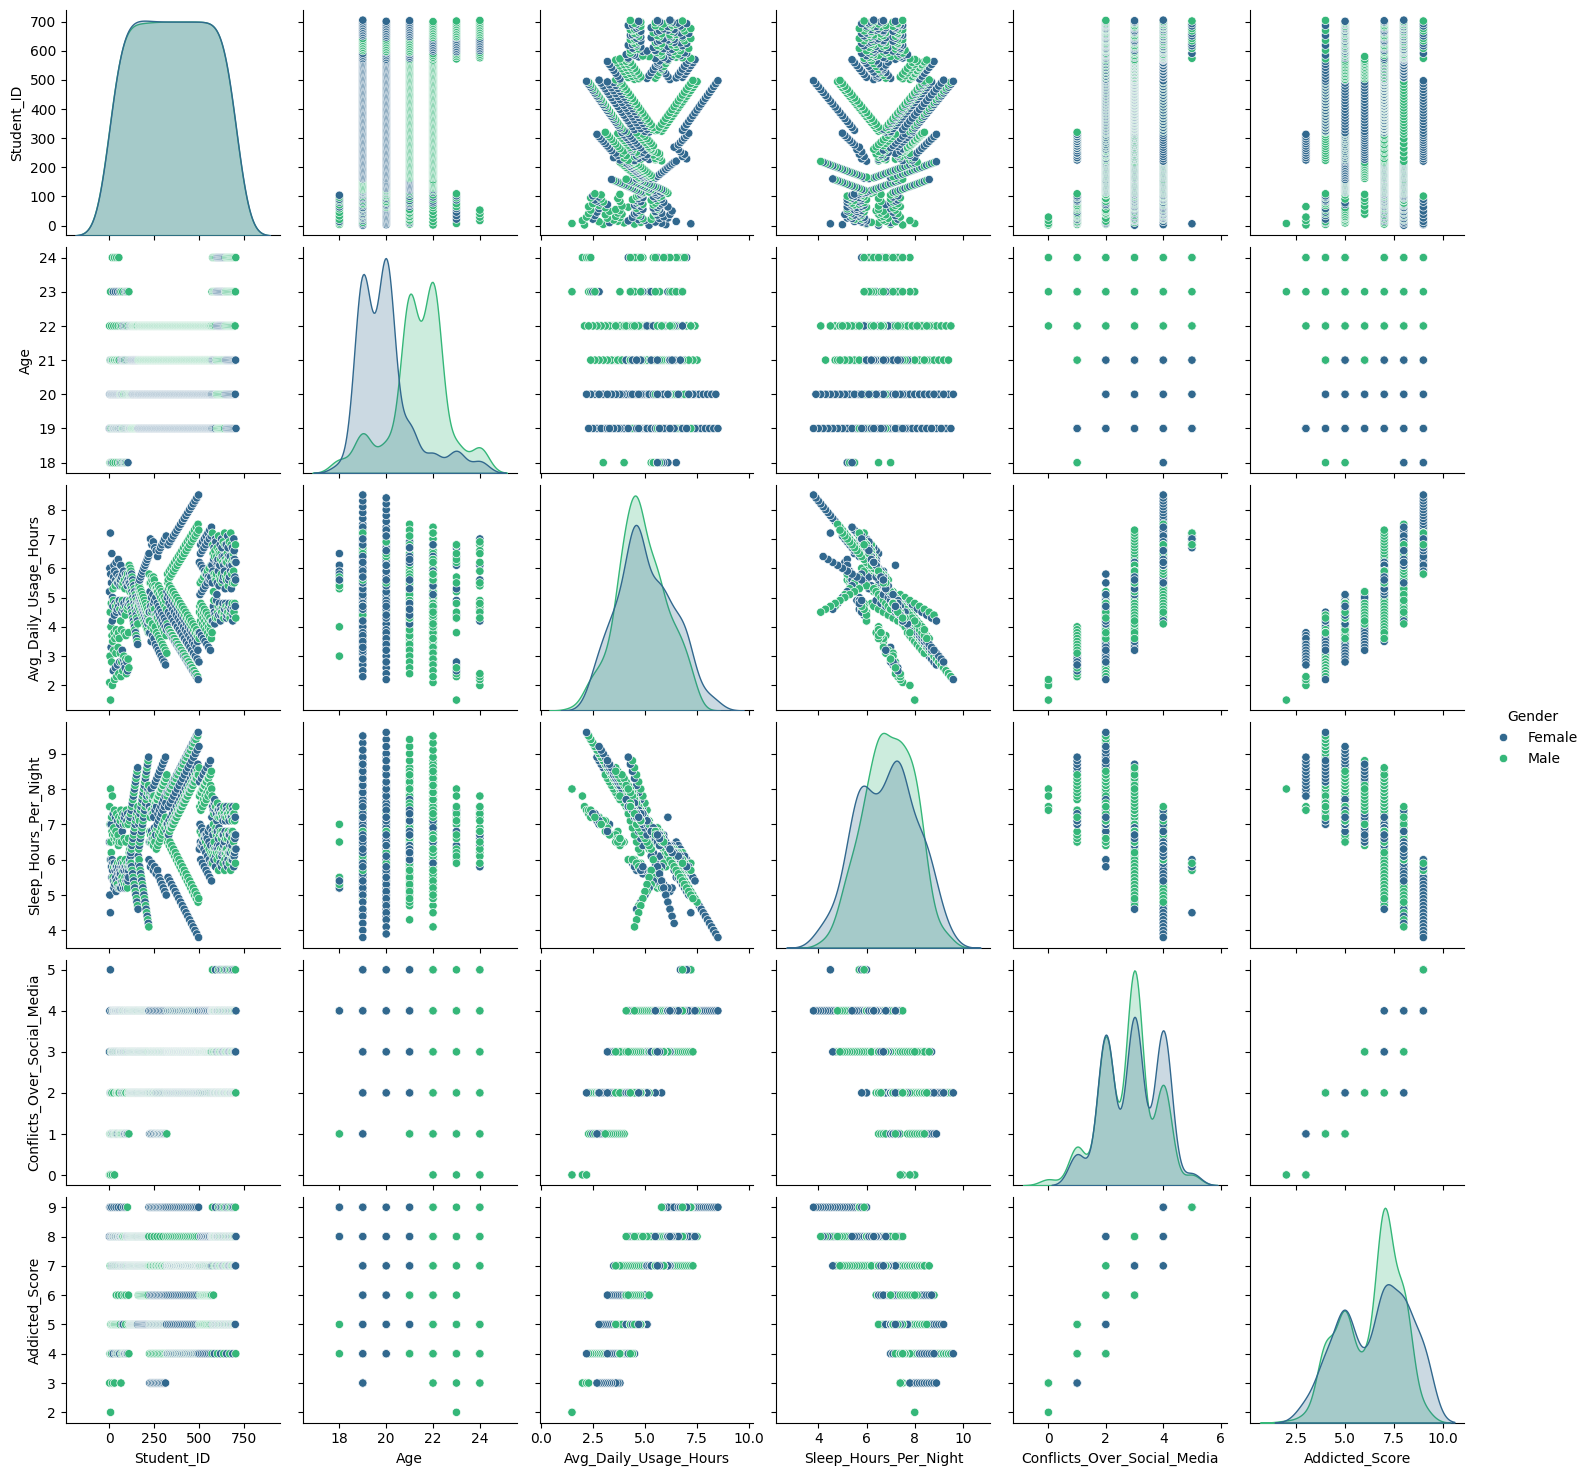

In [24]:
# Pairplot clasificado por género 
if 'Gender' in df_clean.columns:
    sns.pairplot(df_clean, hue='Gender', palette='viridis')
    plt.show()

La variable reina es el tiempo de uso diario, que muestra una fuerte correlación positiva con la puntuación de adicción (a más horas, mayor adicción), lo cual tiene un impacto directo en el descanso, provocando una disminución visible en las horas de sueño conforme aumenta la dependencia. 

A su vez, los conflictos funcionan como un indicador de gravedad, donde los alumnos con más problemas de pareja se agrupan en los niveles más altos de adicción, un patrón que se repite por igual en hombres y mujeres, demostrando que el género no es un factor determinante en este fenómeno.

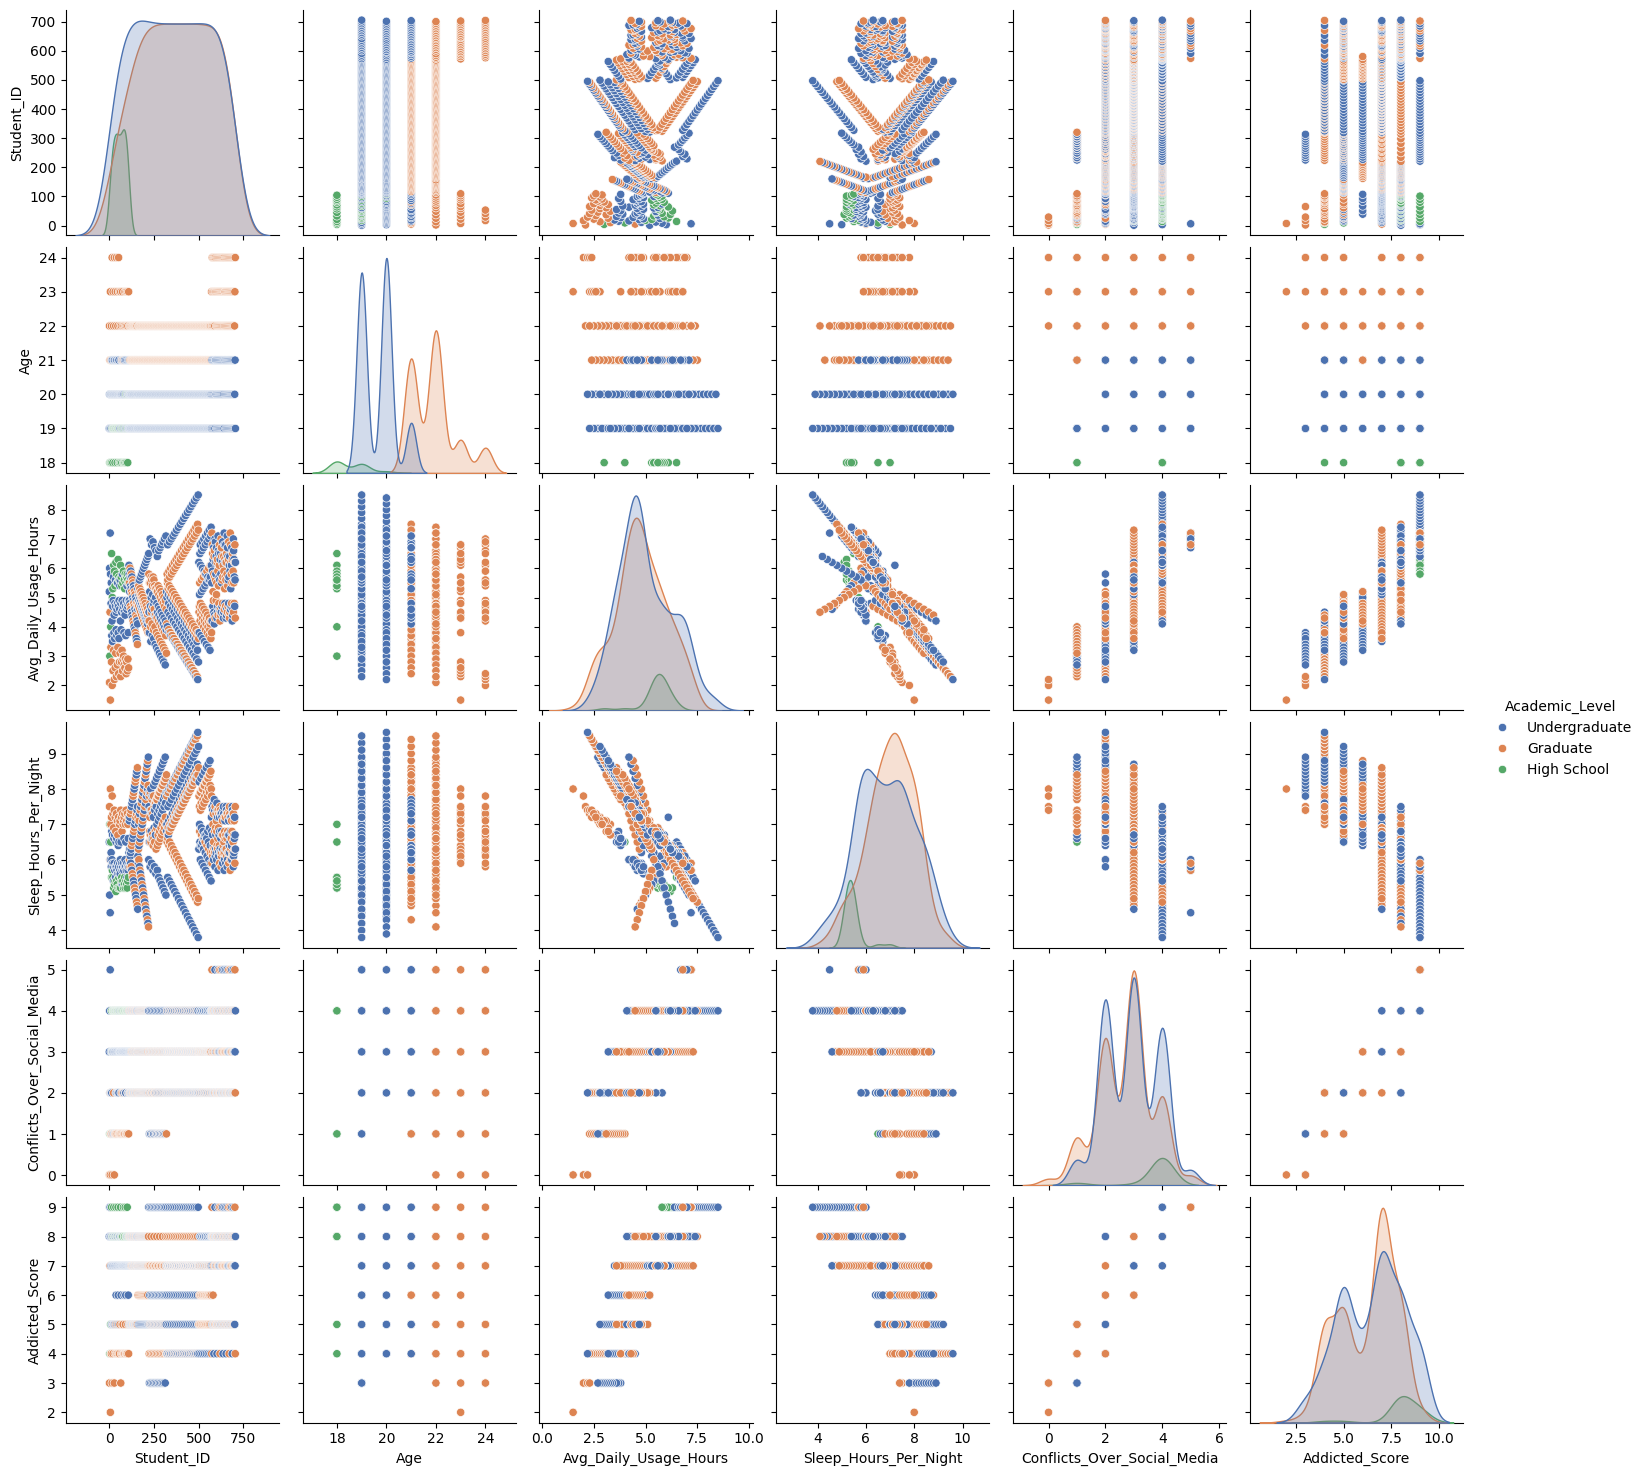

In [25]:
# Pairplot clasificado por el nivel académico
if 'Academic_Level' in df_clean.columns:
    sns.pairplot(df_clean, hue='Academic_Level', palette='deep')
    plt.show()

El comportamiento adictivo es universal e idéntico en todos los niveles educativos. No existen diferencias notables entre los grupos; los puntos naranjas (graduados), azules (universitarios) y verdes (instituto) se mezclan y siguen exactamente las mismas líneas de tendencia en cuanto a uso y conflictos. 

Esto confirma que tener un mayor nivel educativo o ser más mayor no te "protege" ni cambia el patrón de la adicción: la relación directa entre más horas de uso y mayor adicción se cumple con la misma intensidad, sin importar si estás en el instituto o graduado.

### Regresión LINEAL y distribución de los RESIDUOS

R² (Coeficiente de Determinación): 0.9527
RMSE (Error Cuadrático Medio): 0.3442


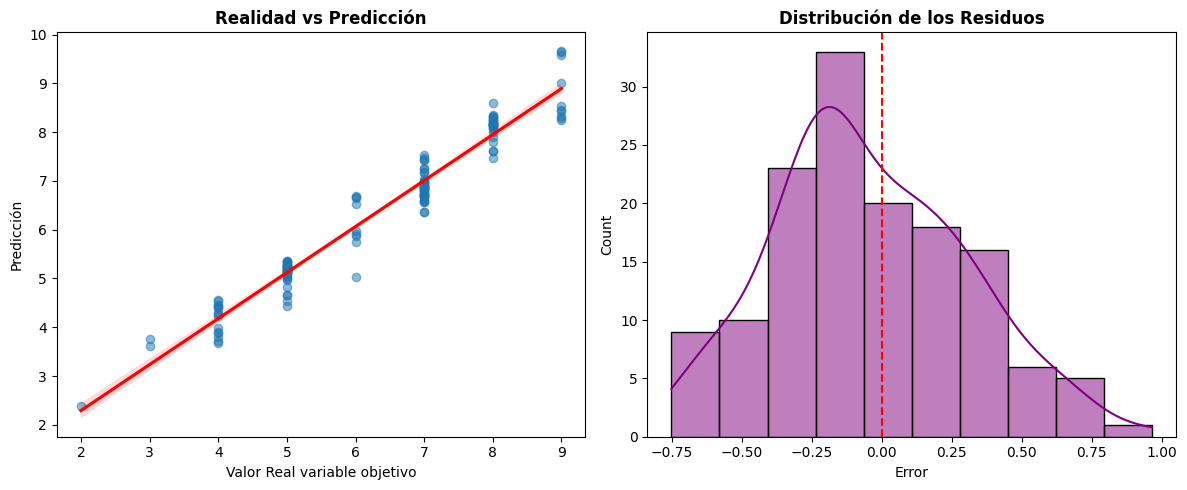

In [27]:
# Mapeo Academic_Level a números para que el modelo pueda procesarlo
academic = {'High School': 1, 'Undergraduate': 2, 'Graduate': 3}
df_modelo = df.copy()
df_modelo['Academic_Level'] = df_modelo['Academic_Level'].map(academic)

# Variables predictoras (X) y objetivo (y)
X = df_modelo[['Age', 'Academic_Level', 'Avg_Daily_Usage_Hours', 
               'Sleep_Hours_Per_Night', 'Mental_Health_Score', 
               'Conflicts_Over_Social_Media']]
y = df_modelo['Addicted_Score']

# TRAIN/TEST SPLIT (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicciones
y_pred = lin_reg.predict(X_test)

# EVALUACIÓN
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² (Coeficiente de Determinación): {r2:.4f}")
print(f"RMSE (Error Cuadrático Medio): {rmse:.4f}")

# VISUALIZACIÓN 
plt.figure(figsize=(12, 5))

# Gráfico 1: Valores Reales vs Predicción
plt.subplot(1, 2, 1)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Realidad vs Predicción', fontweight='bold')
plt.xlabel('Valor Real variable objetivo')
plt.ylabel('Predicción')

# Gráfico 2: Distribución del Error (Residuos)
plt.subplot(1, 2, 2)
residuos = y_test - y_pred
sns.histplot(residuos, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribución de los Residuos', fontweight='bold')
plt.xlabel('Error')

plt.tight_layout()
plt.show()

El coeficiente de determinación (0.95) indica qué porcentaje de la variación de la adicción explica el modelo. Mis variables predictoras explican el 95% de la adicción del estudiante a las redes sociales, esta métrica se denomina una métrica de "bondad de ajuste".

El error cuadrático medio es el error promedio. Si el RMSE es 0.35, significa que, de media, mi modelo se equivoca solo 0.35 puntos al predecir la adicción a las redes sociales de alguien.

Con el gráfico de regresión lineal se comprueba que los valores de adicción están agrupados siguiendo la tendencia de la línea roja, lo cuál indica que el modelo no está sesgado, es decir, no presenta valores atípicos que perturben la estimación.

Con el gráfico de distribución del error vemos que el promedio de errores es 0 (línea discontinua roja). El error puede variar entre -0.75 y 1, es decir, en una escala del 1 al 10 este modelo rara veaz se equivoca por más de 1 punto.

El modelo no tiende a sobreestimar ni subestimar la adicción a las redes sociales.

In [29]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Error Absoluto Medio): {mae:.4f}")

# Coeficientes de determinación de todas las variables predictoras
coeficientes = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Impacto'])
print(coeficientes.sort_values(by='Impacto', ascending=False))

MAE (Error Absoluto Medio): 0.2840
                              Impacto
Conflicts_Over_Social_Media  0.658132
Academic_Level               0.141441
Avg_Daily_Usage_Hours        0.009169
Age                         -0.045195
Sleep_Hours_Per_Night       -0.224689
Mental_Health_Score         -0.678553


Haciendo uso del error absoluto medio, observamos que, de media el modelo se equivoca en 0.28 puntos al predecir la adicción a las redes sociales.

También podemos ver cuánto afecta cada variable a la variable objetivo (coeficiente de determinación de cada variable). Vemos que las variables predictoras que mas efecto tienen sobre mi variable objetivo son "Conflicts_Over_Social_Media" (0.66) y "Mental_Health_Score" (-0.68).

### Regresión LOGÍSTICA

La regresión logística se utiliza para predecir variables categorías como Sí/No o Aprobado/Suspenso, no números exactos.

Por ello, como mi variable objetivo "Addicted_Score" es un número del 1 al 9, voy a aplicar una pequeña transformación previa; convertir ese número en una etiqueta binaria. 
- Estudiante "Adicto a las redes sociales" = 1

- Estudiante "NO Adicto a las redes sociales" = 0

In [30]:
# Definimos "Adicto" si su "Addicted_Score" es mayor o igual a 7
# 1 = Adicto (Riesgo alto), 0 = No Adicto (Riesgo bajo)
df['High_Addiction'] = df['Addicted_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Variables predictoras (X)
features = ['Age', 'Gender', 'Academic_Level', 'Avg_Daily_Usage_Hours', 
            'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']

X = df[features].copy()
y = df['High_Addiction']

# Convierto la variable categórica "Academic_Level", como variable numérica
academic_1 = {'High School': 1, 'Undergraduate': 2, 'Graduate': 3}
X['Academic_Level'] = X['Academic_Level'].map(academic_1)

# Convierto la variable categórica "Gender", como variable numérica (se crea una nueva columna 'Gender_Male' con 1/0)
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializo la Regresión Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Resultados e interpretación 
print("PRECISIÓN DEL MODELO ")
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2%}")
print("\nREPORTE DE CLASIFICACIÓN ")
print(classification_report(y_test, y_pred))

# Coeficientes
coeficientes = pd.DataFrame(modelo.coef_[0], index=X.columns, columns=['Peso (Coeficiente)'])
print("\nIMPORTANCIA DE LAS VARIABLES ")
print(coeficientes.sort_values(by='Peso (Coeficiente)', ascending=False))

PRECISIÓN DEL MODELO 
Exactitud: 97.16%

REPORTE DE CLASIFICACIÓN 
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       0.95      1.00      0.98        79

    accuracy                           0.97       141
   macro avg       0.98      0.97      0.97       141
weighted avg       0.97      0.97      0.97       141


IMPORTANCIA DE LAS VARIABLES 
                             Peso (Coeficiente)
Conflicts_Over_Social_Media            1.588252
Academic_Level                         0.962616
Gender_Male                            0.794200
Avg_Daily_Usage_Hours                  0.529342
Age                                   -0.198707
Sleep_Hours_Per_Night                 -0.683621
Mental_Health_Score                   -4.301447


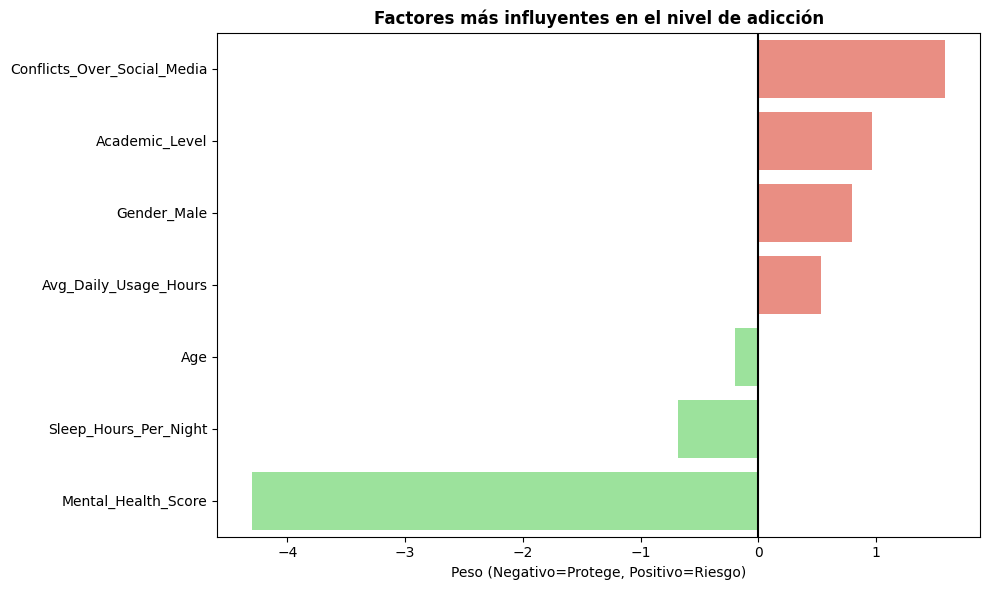

In [31]:
plt.figure(figsize=(10, 6))
coefs = pd.DataFrame(modelo.coef_[0], index=X.columns, columns=['Coeficiente'])
coefs['Color'] = np.where(coefs['Coeficiente'] > 0, 'salmon', 'lightgreen')
coefs = coefs.sort_values(by='Coeficiente', ascending=False)

sns.barplot(x='Coeficiente', y=coefs.index, hue='Color', data=coefs, legend=False, palette={'salmon':'salmon', 'lightgreen':'lightgreen'})
plt.title('Factores más influyentes en el nivel de adicción', fontweight='bold')
plt.xlabel('Peso (Negativo=Protege, Positivo=Riesgo)')
plt.ylabel('')
plt.axvline(x=0, color='black', linestyle='-')

plt.tight_layout()
plt.show()

Mi modelo es capaz de predecir correctamente si un estudiante tiene adicción alta o baja el 97.16% de las veces basándose solo en sus hábitos y perfil.

Confirmamos que la variable "Conflicts_Over_Social_Media" es un fuerte indicador de alerta, en relación con la adicción a las redes sociales y tener una mejor salud mental ("Mental_Health_Score") y dormir más horas ("Sleep_Hours_Per_Night") actúan como un factor protector que reducen la probabilidad de caer en la adicción.

--------------------------------

Incluir la Regresión Logística es una decisión coherente para añadir valor al proyecto, permitiendo crear una herramienta de gestión para clasificar "alertas" (Sí/No) y tomar decisiones.

Sin embargo, la Regresión Lineal es sin duda la mejor herramienta técnica para mi modelo central. La razón principal es que la logística "da menos información" al forzar un corte binario, haciendo que mi variable objetivo solo tome valores de 0 y 1 (tratando igual a un estudiante con una puntuación de 2 que a uno con una de 6, en cuanto a la adicción a las redes sociales), mientras que la lineal conserva todos los valores de mis datos, permitiendo predecir la intensidad exacta del problema con una precisión muy buena (errores bajos y centrados en cero). Por ello, lo mejor es utilizar la regresión lineal como el mejor indicador para explicar el fenómeno con detalle (haciendo uso del coeficiente de determinación y el error cuadrático medio) y la regresión logística como un complemento funcional para la detección de riesgo.

--------------------------------

## PARTE 3: Regresión Lineal "From Scratch" (Datos Simulados)

**Objetivo:** Demostrar que entiendes la matemática detrás de `LinearRegression()` implementándola con NumPy.

Amplia con:

- **Predicción y evaluación**
  Utiliza tu implementación para:
  - Realizar predicciones
  - Calcular manualmente el **MSE** y el **R²**, sin usar funciones de Scikit-Learn.

- **Comparación con Scikit-Learn**
  Entrena un modelo `LinearRegression()` sobre los mismos datos y compara:
  - Coeficientes
  - Métricas de evaluación  
  Discute posibles diferencias numéricas.


#### Implementación con NumPy

Intercepto estimado (NumPy): [4.03928864]
Pendiente estimada (NumPy): [2.85211122]


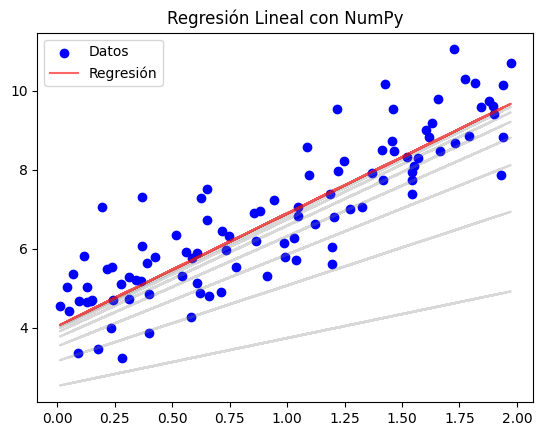

In [32]:
# --- NO TOCAR: GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)
# -----------------------------------

def evolve_linear_regression( X, y, iteraciones=8, eta=0.1 ):
    """
    Calcula la pendiente (w) y el intercepto (beta_0)
    usando las fórmulas de OLS con NumPy.
    Returns: (b, w)
    """
    n = len(X)

    #Generacion aleatoria de parametros (numpy)
    w = np.random.randn(1)
    b = np.random.randn(1)

    for i in range(iteraciones):
        # calcular el error
        y_pred= b + w * X
        error = y - y_pred
        #Gradientes
        dw = (-2/n) * np.sum(X * error)
        db = (-2/n) * np.sum(error)
        #Ajustar parametros
        w = w - eta * dw
        b = b - eta * db  
        pintar_recta(b, w, X, y)
    return b, w

        #pintar recta
        
def pintar_recta(b, w, X, y):

    plt.plot(X_mock, b + w * X_mock, color='gray', alpha = 0.3)

# Probemos tu función
b0, b1 = evolve_linear_regression(X_mock, y_mock)
print(f"Intercepto estimado (NumPy): {b0}")
print(f"Pendiente estimada (NumPy): {b1}")

# Verificación visual
plt.scatter(X_mock, y_mock, color='blue', label='Datos')
plt.plot(X_mock, b0 + b1 * X_mock, color='red', alpha = 0.6, label='Regresión')
plt.title('Regresión Lineal con NumPy')
plt.legend()
plt.show()

#### Implementación con Scikit - Learn

Intercepto estimado (Scikit-Learn): 4.2151
Pendiente estimada (Scikit-Learn):  2.7701


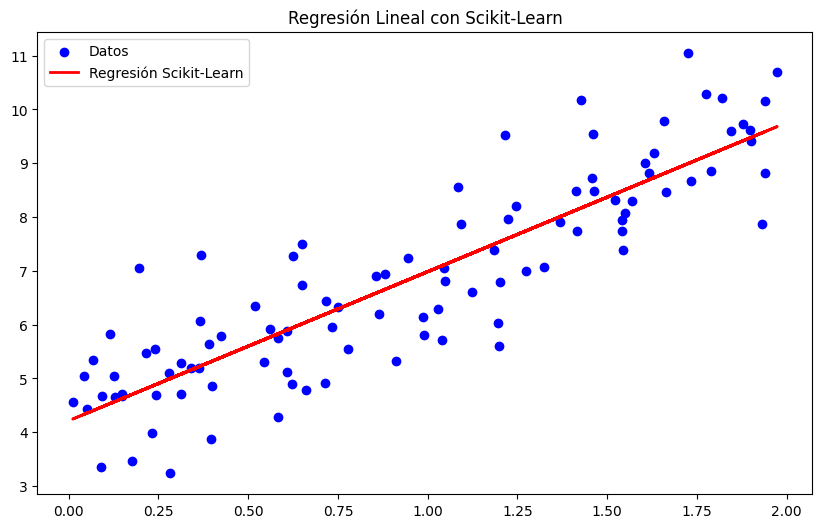

In [33]:
# --- GENERACIÓN DE DATOS ---
np.random.seed(42)
X_mock = 2 * np.random.rand(100, 1)
y_mock = 4 + 3 * X_mock + np.random.randn(100, 1)

# Instanciamos el modelo
modelo = LinearRegression()

# Entrenamos el modelo
modelo.fit(X_mock, y_mock)

# Resultados del modelo
b0 = modelo.intercept_[0] # El intercepto (beta_0)
b1 = modelo.coef_[0][0]   # La pendiente (w)

print(f"Intercepto estimado (Scikit-Learn): {b0:.4f}")
print(f"Pendiente estimada (Scikit-Learn):  {b1:.4f}")

# Visualización del modelo
plt.figure(figsize=(10, 6))

# Datos reales (puntos azules) y predicción (línea roja)
plt.scatter(X_mock, y_mock, color='blue', label='Datos')

y_pred = modelo.predict(X_mock) 
plt.plot(X_mock, y_pred, color='red', linewidth=2, label='Regresión Scikit-Learn')
plt.title('Regresión Lineal con Scikit-Learn')
plt.legend()
plt.show()

Al comparar ambas implementaciones, la diferencia fundamental radica en la precisión y el método de optimización. Mientras que la solución con Scikit-Learn utiliza el método de Mínimos Cuadrados Ordinarios (OLS), que es una solución analítica cerrada y calcula instantáneamente los parámetros óptimos matemáticos, la implementación con NumPy utiliza el método de Descenso de Gradiente, un método iterativo que se aproxima a la solución paso a paso. 

En definitiva Scikit-Learn, numéricamente, gana en precisión porque no depende de ajustar hiperparámetros (como el número de iteraciones), mientras que el método manual con NumPy es mucho mejor para entender cómo funcionan y "aprenden" las redes neuronales, aunque requiera de muchas iteraciones para llegar a una precisión alta.

--------------------------------

## PARTE 4: Series Temporales (Datos Simulados)

**Objetivo:** Analizar tendencias y estacionalidad en una serie temporal generada.

**Tareas:**
1.  Convierte el índice a formato DateTime.
2.  Haz un resampleo mensual (`'M'`) mostrando la media de ventas.
3.  Calcula una **Media Móvil** de 3 meses para suavizar la curva.
4.  Usa `seasonal_decompose` para visualizar los componentes (Tendencia, Estacionalidad y ruido).

---

Amplia Con:

- **Generación de la serie**
  Describe brevemente cómo se ha generado la serie temporal simulada, indicando si incluye tendencia, estacionalidad y ruido.

- **Comparación de suavizados**
  Calcula una segunda media móvil con una ventana distinta y compara visualmente ambos suavizados. Comenta las diferencias observadas.

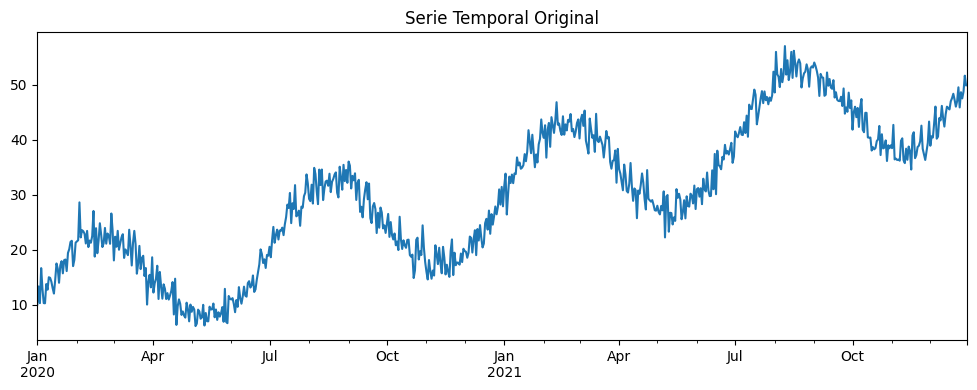

Muestra del Resampleo Mensual
2020-01-31    15.598345
2020-02-29    22.606451
2020-03-31    18.884271
2020-04-30    11.239207
2020-05-31     8.511417
Freq: ME, Name: Sales, dtype: float64


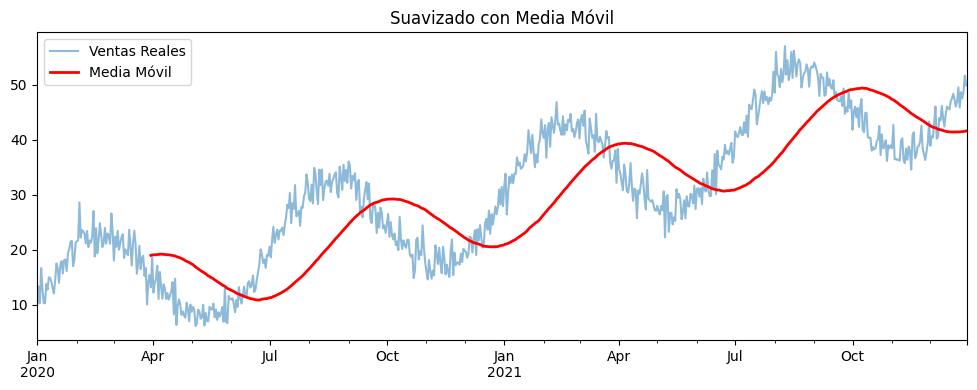

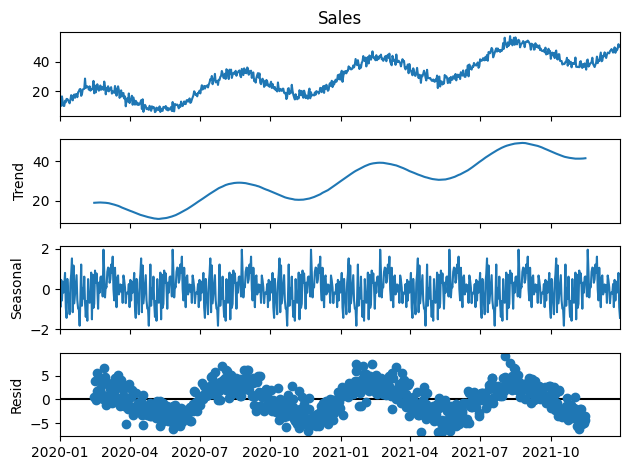

In [34]:
# --- NO TOCAR: GENERACIÓN DE DATOS TEMPORALES ---
dates = pd.date_range(start='2020-01-01', periods=365*2, freq='D')
values = np.linspace(10, 50, len(dates)) + 10 * np.sin(np.linspace(0, 3.14*8, len(dates))) + np.random.normal(0, 2, len(dates))
ts_df = pd.DataFrame({'Sales': values}, index=dates)
# -----------------------------------------------

# Visualización de los datos crudos
ts_df['Sales'].plot(title='Serie Temporal Original', figsize=(12, 4))
plt.show()

# Resampleo mensual mostrando la media de ventas
# Agrupo los datos diarios en meses y calculo la media de cada mes
monthly_sales = ts_df['Sales'].resample('ME').mean()

print("Muestra del Resampleo Mensual")
print(monthly_sales.head())

# Media Móvil de 3 meses (90 días)
ts_df['Moving_Avg_3M'] = ts_df['Sales'].rolling(window=90).mean()

# Grafico de comparación entre la media móvil y las ventas reales
plt.figure(figsize=(12, 4))
ts_df['Sales'].plot(label='Ventas Reales', alpha=0.5)
ts_df['Moving_Avg_3M'].plot(label='Media Móvil', color='red', linewidth=2)
plt.title('Suavizado con Media Móvil')
plt.legend()
plt.show()

# Uso de seasonal_decompose
result = seasonal_decompose(ts_df['Sales'], model='additive', period=90)

result.plot()
plt.show()

En la Descomposición Estacional, se puede observar el desglose de esta serie temporal en sus componentes estructurales: se ve una tendencia clara y oscilante y una **estacionalidad** perfectamente repetitiva; sin embargo, el gráfico de **residuos** muestra un patrón de onda visible en lugar de un ruido aleatorio puro, lo que indica que la fórmula de NumPy utilizada para generar los datos contiene una complejidad o ciclo adicional que el modelo de descomposición estándar no logró capturar completamente, dejando esa estructura "oculta" en el error.

### Comparación de suavizados

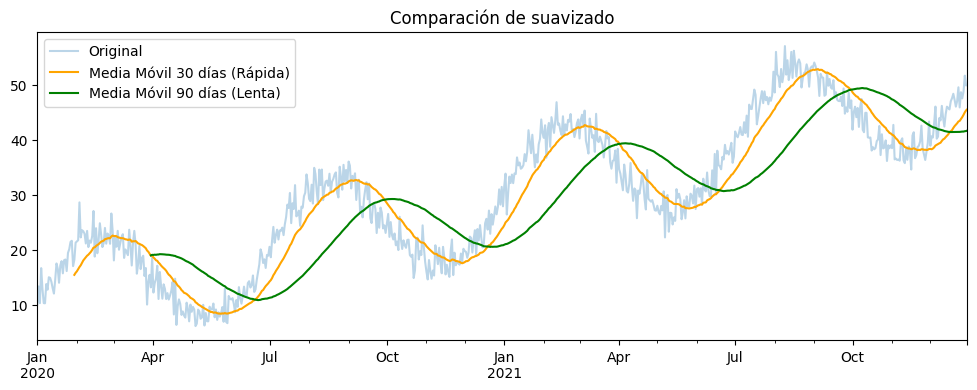

In [35]:
ts_df['Moving_Avg_1M'] = ts_df['Sales'].rolling(window=30).mean()

plt.figure(figsize=(12, 4))
ts_df['Sales'].plot(alpha=0.3, label='Original')
ts_df['Moving_Avg_1M'].plot(label='Media Móvil 30 días (Rápida)', color='orange')
ts_df['Moving_Avg_3M'].plot(label='Media Móvil 90 días (Lenta)', color='green')
plt.title('Comparación de suavizado')
plt.legend()
plt.show()

Este gráfico presenta una comparativa visual clásica del impacto del tamaño de la ventana en el suavizado de series temporales, demostrando el compromiso inherente entre sensibilidad y estabilidad. La media móvil de 30 días (línea naranja) actúa como una señal "rápida" que sigue de cerca el comportamiento de los datos originales, capturando las fluctuaciones a corto plazo con poco retraso, mientras que la media móvil de 90 días (línea verde) ofrece una visión "lenta" o macroscópica; al promediar más datos, lo que la hace ideal para identificar la dirección general a largo plazo a costa de perder reactividad inmediata.